
# **DATA 311 UBCO, KNN Classification implemented in Python**

## **Assignment 2, KNN Classification:**

### **Nearest Neighbors Classification:**

In [76]:
##decleration & data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('myopiacomma.csv')
df.head(10)

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1995,0,6,0,1.744,22.14,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,7,1993,0,6,1,0.683,22.33,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,8,1991,0,6,1,1.272,22.39,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,9,1991,0,7,0,1.396,22.62,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,10,1991,0,6,1,0.972,22.74,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [ ]:
df.describe()

In [ ]:
df = df.dropna()

df.describe()

### **First we split the data into a training & testing set yet again:**

In [77]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.6*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['ID', 'STUDYYEAR', 'MYOPIC', 'AGE', 'GENDER', 'SPHEQ', 'AL', 'ACD',
       'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR',
       'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

### **Now we are ready to fit the classification model:**

setup:

In [78]:
x_train = training_data[['SPHEQ', 'AL', 'ACD']]
y_train = training_data['MYOPIC']
x_test = testing_data[['SPHEQ', 'AL', 'ACD']]
y_test = testing_data['MYOPIC']
k_grid = [7, 13, 18, 23, 29, 34, 39, 45, 50]
accuracy_grid = []
i = 0

training:

    the training implementation is simply model = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train) for k neighbors & x_train/y_train for the data

    & the testing implemntation is model.predict(x_test)

In [79]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
myopic_pred = knn.predict(x_test)
accuracy = (y_test == myopic_pred).mean()

accuracy_grid.append(accuracy*100)

now lets run the following 9 times to make the array

In [88]:
k = k_grid[i]
knn = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
myopic_pred = knn.predict(x_test)
accuracy = (y_test == myopic_pred).mean()*100

accuracy_grid.append(accuracy)

print(i, " ", k, " ", accuracy)
i = i+1

8   50   87.04453441295547


& then we plot it

Text(0.5, 1.0, 'Accuracy vs Number of Neighbors')

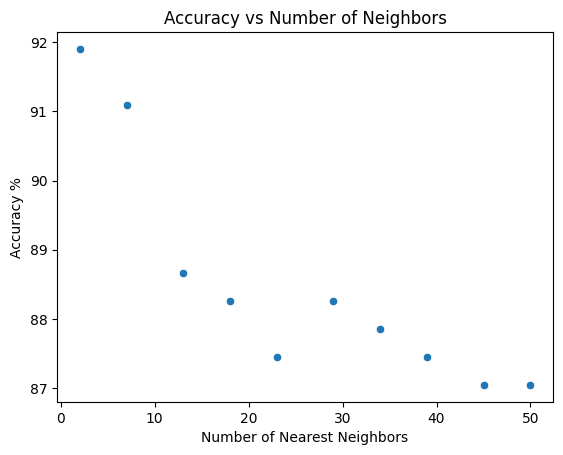

In [91]:
k_grid = [2, 7, 13, 18, 23, 29, 34, 39, 45, 50]

data = pd.DataFrame({'Number of Nearest Neighbors': k_grid, 'Accuracy %': accuracy_grid})
sns.scatterplot(x='Number of Nearest Neighbors', y='Accuracy %', data=data)
plt.title('Accuracy vs Number of Neighbors')
